**420-A58-SF - Algorithmes d'apprentissage non supervisé - Hiver 2023 - Spécialisation technique en Intelligence Artificielle**<br/>
MIT License - Copyright (c) 2023 Mikaël Swawola
<br/>
![Travaux Pratiques - Systèmes de recommandation](static/03-03-banner.png)
<br/>
**Objectif: Implémenter et évaluer l'algorithme de filtrage collaboratif sur un jeu de données constitué de notations de films et effectuer des prédictions sur de nouveaux utilisateurs**

In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd
import numpy as np

## 1 - Chargement et exploration sommaire des données

Nous commencons par charger le jeu de données des notations de films et essayons de comprendre la structure des données

**Exercice 1-1 - À l'aide de NumPy, chargez le jeu de données contenu dans le fichier `movies.npz`. Quels tableaux sont disponibles dans ce fichier ?**

In [7]:
# Compléter cette cellule ~ 2 lignes de code
data = np.load('../../data/movies.npz')
data.files

['Y', 'R']

**Exercice 1-2 - Quelles sont les dimensions respectives des tableaux contenus dans l'objet `movies` ?**

In [32]:
# Compléter cette cellule ~ 2 lignes de code

len(data['Y'])
## Y:  1682 * 943

#len(data['R'][0])
data['R']
## R: 1682 * 943

### 1682 movies, 943 ratings

array([[1, 1, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [33]:
data['Y']

array([[5, 4, 0, ..., 5, 0, 0],
       [3, 0, 0, ..., 0, 0, 5],
       [4, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

**Exercice 1-3 - Quel est le type de notation utilisée ?**

In [39]:
# Compléter cette cellule ~ 1 ligne de code
print(np.unique(data['Y']))
print(np.unique(data['R']))

[0 1 2 3 4 5]
[0 1]


**Exercice 1-4 - Calculer la moyenne des notes du premier film. Identifiez ce film à l'aide du fichier movie_ids.txt**

In [43]:
# Compléter cette cellule ~ 1-4 lignes de code
Y_ = data['Y']
R_ = data['R']

## wrong
Y_[0,].mean()

## correct (considers only rated movies)
mask = R_[0,] ==1
Y_[0, mask].mean()
#dfMovies = pd.read_csv('../../data/movie_ids.txt', encoding="ISO-8859-1")
#dfMovies = pd.read_csv('../../data/movie_ids.txt', encoding="utf-8")
#dfMovies

3.8783185840707963

In [44]:
!cat ../../data/movie_ids.txt | head

1 Toy Story (1995)
2 GoldenEye (1995)
3 Four Rooms (1995)
4 Get Shorty (1995)
5 Copycat (1995)
6 Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)
7 Twelve Monkeys (1995)
8 Babe (1995)
9 Dead Man Walking (1995)
10 Richard III (1995)


**Exercice 1-5 - À l'aide d'une méthode de votre choix, afficher la matrice d'utilité. Que constatez-vous ?**

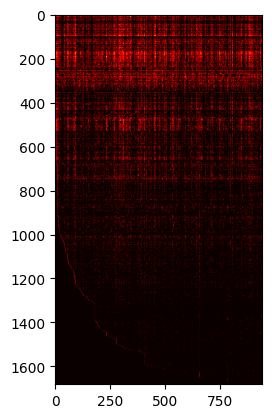

In [45]:
# Compléter cette cellule ~ 1-2 lignes de code
import matplotlib.pyplot as plt
plt.imshow(Y_, cmap='hot')

## l'image est stratifiée
## Un échantillonage doit être aléatoire sinon on peut prendre un échantillon pas répresentatif

## 2 - Filtrage collaboratif

Nous allons maintenant implémenter l'algorithme de filtrage collaboratif. Afin de faciliter la tâche, nous allons y aller en plusieurs étapes ;-)

**Exercice 2-1 - "Retirer" des données du jeu d'entraînement pour constituer un jeu de test. Prenez 10% des notes pour le test**

In [46]:
from sklearn.model_selection import train_test_split

In [48]:
# Compléter cette cellule ~ 1-2 lignes de code
def get_train_test(pDfX, pDfY, pTestSize, pRandomState= np.random.seed(2023)):
    X = pDfX
    y = pDfY

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=pTestSize, random_state =pRandomState)
    return X_train, X_test, y_train, y_test

In [70]:
# 1. Trouver les coordonnés de notes
# 2. Choisir 10% de ces notes au hasard
# 3. Enlever les notes choisies au 2. du jeu de données

#1
coord_notes = np.where(R_==1)
indexes = coord_notes
print(coord_notes)

#2
test_indices = np.random.choice(len(coord_notes), int(len(coord_notes)*0.1), replace=False)
test0 = indexes[0][test_indices]
test1 = indexes[1][test_indices]
#test10 = indexes[10][test_indices]

#3
R = R_.copy()
## retirer les notes de test
R[test0, test1]=0
R.sum()


Y = Y_.copy()

#mask2 = R_[:,] ==1
#len(Y_[mask2])

(array([   0,    0,    0, ..., 1679, 1680, 1681]), array([  0,   1,   4, ..., 862, 895, 915]))


**Exercice 2-2 - Initialiser les variables `n_movies`, `n_users`. Initialiez aussi n (nombre de features du vecteur profile) à 10**

In [75]:
# Compléter cette cellule ~ 3 lignes de code
Y.shape[0]
n_movies = Y.shape[0] 
n_users = Y.shape[1]
n = 10

**Exercice 2-3 - Initialiser aléatoirement les vecteurs $\theta$ et $X$**

In [78]:
# Compléter cette cellule ~ 2-3 lignes de code
theta = np.random.rand(n_users,n)
theta.shape
theta[0]
## theta ne sont pas les notes, c'est la matrice qui représente le profil de l'utilisateur

X = np.random.rand(n_movies, n)

print(f'theta:  {theta.shape}')
print(f'X:  {X.shape}')

theta:  (943, 10)
X:  (1682, 10)


**Exercice 2-4 - Calculer la fonction de coût non régularisée telle que vue en cours**

In [81]:
# Compléter cette cellule ~ 3 lignes de code
print(np.dot(X, theta.T).shape)
J = (np.dot(X, theta.T) - Y)
J = J**2
J = R*J
J = J.sum()/2
J

(1682, 943)


137852.8550778349

**Exercice 2-5 - Ajouter les termes de régularisation au coût calculé précédemment. Prenez $\lambda=10$**

In [84]:
# Compléter cette cellule ~ 1-2 lignes de code
L = 10
J_reg = J + (L/2)*(X**2).sum() + (L/2)*(theta**2).sum()
J_reg


181747.6833464732

**Exercice 2-6 - À l'aide des question précédentes, complétez la fonction `cost_reg_func()` permettant de calculer le coût régularisé. Notez que pour faciliter l'étape d'apprentissage plus bas dans le notebook, cette fonction n'accepte les paramètres que sous la forme d'un seul vecteur.**

In [85]:
def cost_reg_func(parameters, *args):
    # Compléter le code ci-dessous ~ 1-4 lignes de code
    # Obtient les arguments de la fonction
    Y, R, L, n_movies, n_users, n = args

    # "Déroule" le vecteur de paramètres
    parameters = parameters.reshape(n_movies + n_users, n)

    # "Sépare" X et theta
    X = parameters[:n_movies,:]
    theta = parameters[n_movies:,]

    J = (np.dot(X, theta.T) - Y)
    J = J**2
    J = R*J
    J = J.sum()/2

    J_reg = J + (L/2)*(X**2).sum() + (L/2)*(theta**2).sum()

    return J_reg
    

La cellule ci-dessous permet de tester la fonction `cost_reg_func`. Vous devriez obtenir une valuer identique à celle de la **question 2-3**

In [86]:
parameters = np.vstack([X, theta]).flatten()
cost_reg_func(parameters, *(Y, R, 10, n_movies, n_users, n))

181747.6833464732

**Exercice 2-7 - Calculez les gradient non régularisés de $X$ et $\theta$**

In [ ]:
# Compléter cette cellule ~ 2-4 lignes de code

**Exercice 2-8 - Ajoutez la régularisation aux gradients calculés précédemment**

In [ ]:
# Compléter cette cellule ~ 2-3 lignes de code

**Exercice 2-9 - À l'aide des question précédentes, complétez la fonction `grad_reg_func()` permettant de calculer les gradients régularisés. Comme pour l'exercice 2-4, notez que pour faciliter l'étape d'apprentissage plus bas dans le notebook, cette fonction n'accepte les paramètres que sous la forme d'un seul vecteur.**

In [ ]:
def grad_reg_func(parameters, *args):
    # Compléter le code ci-dessous ~ 6 lignes de code
     # Obtient les arguments de la fonction
    Y, R, L, n_movies, n_users, n = args

    # "Déroule" le vecteur de paramètres
    parameters = parameters.reshape(n_movies + n_users, n)

    # "Sépare" X et theta
    X = parameters[:n_movies,:]
    theta = parameters[n_movies:,]

    
    None

La cellule ci-dessous permet de tester la fonction `grad_reg_func`. 

In [ ]:
parameters = np.vstack([X, theta]).flatten()
grad_reg_func(parameters, *(Y, R, 10, n_movies, n_users, n))

## 3 - Entraînement du filtrage collaboratif (optionnel)

Maintenant que nous avons les fonctions `cost_reg_func` et `grad_reg_func`, nous pouvons procéder à la phase d'entraînement de note système de recommandation basé sur le filtrage collaboratif. Pour rappel, nous devons trouver la valeur des paramètres qui minimisent la fonction de coût.

**Exercice 3-1: Avant d'entraîner votre modèle, normalisez par la moyenne les notes du jeu de données. N'oubliez pas que certaines données ont été réservées au test**

In [ ]:
# Compléter cette cellule ~ 4-5 lignes de code

**Exercice 3-2: Entraînez votre modèle à l'aide de la fonction `fmin_cg` de la librairie SciPy. Référez-vous à la documentation ci-dessous pour les détails de mise en oeuvre. Prenez $\lambda=10$**<br/>
[scipy.optimize.fmin_cg](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin_cg.html)<br/>
**Remarque: selon votre machine, l'optimisation peut durer plusieurs minutes**

In [ ]:
# Compléter la cellule ci-dessous

## 4 - Effectuer les prédiction

**Exercice 4-1 - À l'aide des éléments vus en cours, effectuez les prédictions (vous devrez d'abord "extraire" les vecteur $X$ et $\theta$ du modèle. Calculez la moyenne des prédictions pour le premier film de la liste. Comparez avec la valeur obtenue à l'exercice 1-4**

In [ ]:
# Compléter cette cellule ~ 1-2 lignes de code

**Exercice 4-2 - Calculez l'erreur de prédiction sur le jeu de test.Choisissez une métrique appropriée**

In [ ]:
# Compléter cette cellule ~ 2-4 lignes de code

## 5 - Recommandation basée sur le contenu

Nous allons maintenant ajouter un nouvel utilisateur (vous-même !) au jeu de données et apprendre le vecteurs de paramètres correspondant. Puisque nous n'ajoutons pas de nouveaux films, nous pouvons garder les vecteurs $X$ et appliquer une recommandation basée sur le contenu

**Exercice 5-1 - En vous réferant à la liste des films, choisissez environ 10 films que vous connaissez et notez les**

In [ ]:
# Compléter cette cellule ~ 2-4 lignes de code

**Exercice 5-2 - Adaptez les fonctions `cost_reg_func` et `grad_reg_func` pour correspondre à la recommandation basée sur le contenu**

In [ ]:
# Compléter cette cellule

**Exercice 5-3 - Entraînez le modèle pour apprendre les paramètres $\theta$ et réalisez les prédictions pour le nouvel utilisateur**

In [ ]:
# Compléter cette cellule ~ 6-8 lignes de code

## 6 - Films similaires

**Exercice 6-1 - Trouvez le film le plus similaire à Star Wars (celui de 1977)**

In [ ]:
# Compléter cette cellule ~ 10-15 lignes de code

## Fin du TP